# Heart Failure Model: Using different linear systems

I tried to find the relationship between factors from the patients who experienced heart failure.
This dataset includes medical records of 299 patients who had heart failure and each patients have 13 medical features. 

DEATH_EVENT = 0 represents the surviving patients and DEATH_EVENT = 1 represents the deceased patients.


My goal was to focus on four features which are creatine phosphokinase, serum creatinine, serum sodium, platelets and find relationship between these features and the death event by using multiple linear models and its’ variants.


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from matplotlib.pyplot import figure

# Data loading and preprocessing 

In [33]:
train_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Seperated the data into deceased and survived patients to df_0 and df_1 with four focusing features to build models and compare two models.

In [34]:
df = train_df[["creatinine_phosphokinase", "serum_creatinine", "serum_sodium", "platelets", "DEATH_EVENT"]]
df_0 = df.loc[df["DEATH_EVENT"] == 0]
df_1 = df.loc[df["DEATH_EVENT"] == 1]

In [35]:
df_0.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
14,80,1.0,138,427000.0,0
20,52,1.3,137,276000.0,0
23,63,0.8,135,368000.0,0
33,159,1.2,138,302000.0,0
38,2656,2.3,137,305000.0,0


In [36]:
df_1.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
0,582,1.9,130,265000.00,1
1,7861,1.1,136,263358.03,1
2,146,1.3,129,162000.00,1
3,111,1.9,137,210000.00,1
4,160,2.7,116,327000.00,1


# Data Normalization

Since the feature values for this dataset varies by a large amount, it is a good measure to normalize them for future computation after fitting them into linear models.

In [49]:
scaler = MinMaxScaler() 
df_0_scaled = scaler.fit_transform(df_0)
df_1_scaled = scaler.fit_transform(df_1)

In [50]:
df_0_scaled

array([[0.00965437, 0.08928571, 0.71428571, 0.48721057, 0.        ],
       [0.00424792, 0.14285714, 0.68571429, 0.30415808, 0.        ],
       [0.00637189, 0.05357143, 0.62857143, 0.41568675, 0.        ],
       ...,
       [0.39196756, 0.05357143, 0.71428571, 0.86907504, 0.        ],
       [0.46012744, 0.16071429, 0.77142857, 0.13928961, 0.        ],
       [0.03205252, 0.19642857, 0.65714286, 0.44841799, 0.        ]])

# Data Visualization

I made correlation heatmap to see the correlation between four features of deceased and surviving patients

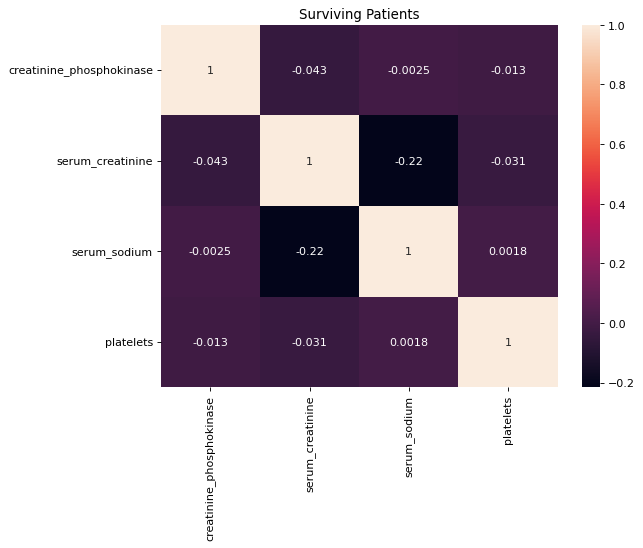

In [52]:
figure(figsize=(8, 6), dpi=80)
df_0_small = df_0.iloc[:,:4]
corr_mat = df_0_small.corr()
sns.heatmap(corr_mat, annot = True)
plt.title("Surviving Patients")
plt.show()

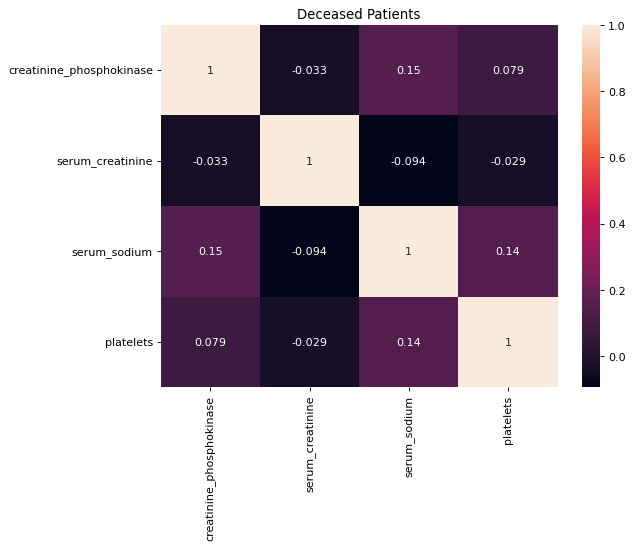

In [23]:
figure(figsize=(8, 6), dpi=80)
df_1_small = df_1.iloc[:,:4]
corr_mat = df_1_small.corr()
sns.heatmap(corr_mat, annot = True)
plt.title("Deceased Patients")
plt.show()

Correlation matrix shows that serum sodium and platelets features have the highest correlation and serum creatinine and creatinine phosphokinase have the lowest correlation for surviving patients. For deceased patients serum creatinine and creatinine phosphokinase have the highest correlation and serum sodium and serum creatinine have the lowest correlation. 
The correlation result is different for both cases.


# Data exploration

After taking a look at the correlation matrix, I made a group of two features with the highest correlation to fit into the linear models and get a better understanding of the data.

X: serum sodium, Y: platelets

First, I put features into simple linear regression model for surviving patients and computed predicted values.

I splited the data into 50/50 and fit the model

In [71]:
X = df_0_scaled[:,2]
y = df_0_scaled[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

In [74]:
def show_model(X,y,degree):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)
    figure(figsize=(8, 6), dpi=80)
    weights = np.polyfit(X_train,y_train,degree)
    model = np.poly1d(weights)
    y_predict = model(X_test)
    plt.scatter(X_train, y_train, color = "r")
    plt.scatter(X_test, y_predict, color = "b")
    plt.show()
    SSE = np.sum(np.square(y_test - y_predict))
    return SSE 

Plots after fitting the model into simple linear regression model

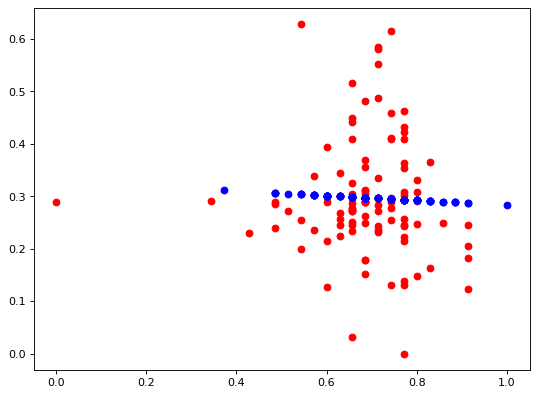

1.5538349005113852

In [82]:
show_model(X,y,1)

Plots after fitting the model into quadratic model

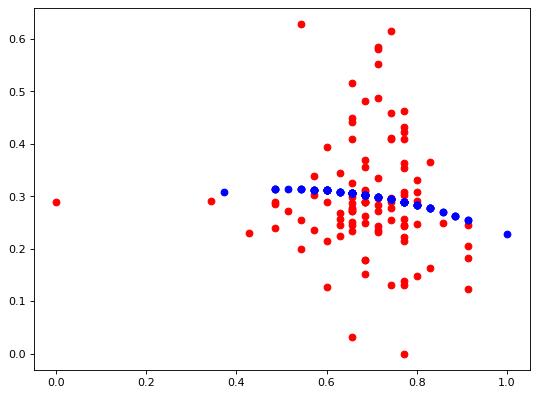

1.5998957916838272

In [79]:
show_model(X,y,2)

After fitting the model, I computed the sum of the squared residuals (SSE) to compare these models later and find the best model to use. 

Plots after fitting the model into cubic spline model

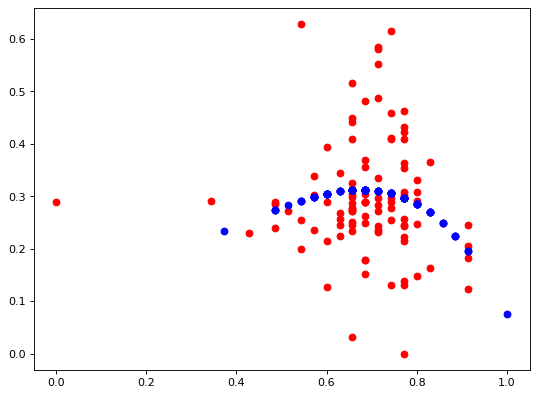

1.6935310328627005

In [80]:
show_model(X,y,3)

After computing sum of squared errors for 3 linear models, I found that for features simple linear model gave the least sum of squared errors and cubic spline model gave the highest sum of square error.

Therefore, the best model for surviving patient was simple linear model and the worst model was cubic spline model.

Next, I fitted multiple models into deceased patient dataset to see which model gave the highest accuracy.

In [83]:
X = df_1_scaled[:,2]
y = df_1_scaled[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

Plots after fitting the model into simple linear regression model

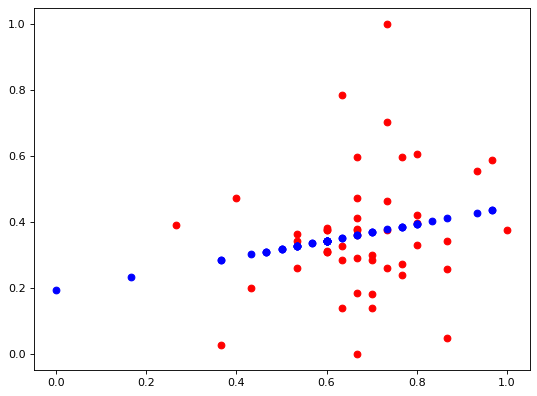

1.2190659574455822

In [84]:
show_model(X,y,1)

Plots after fitting the model into quadratic model

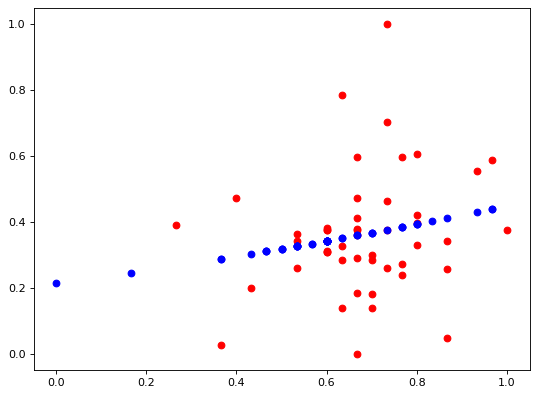

1.2141180903909639

In [85]:
show_model(X,y,2)

Plots after fitting the model into cubic spline model

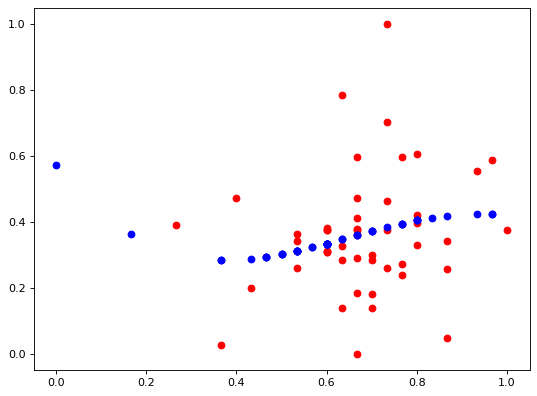

1.2329045848773434

In [86]:
show_model(X,y,3)

For surviving patients best model was quadratic model since it had the least sum of squared errors and the worst model was cubic spline model with the highest sum of squared errors.